# Bike Thefts Berlin - EDA

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
PATH = '../data'

In [30]:
time_parseable = ['start_date_delict', 'end_date_delict']

## Prep data inspection

In [31]:
class BikeThefts():
    '''Read, inspect and transform initial data.'''

    def __init__(self, path = PATH) -> None:
        self.path = path

    def read_initial_data(self, file) -> pd.DataFrame:
        '''Return DataFrame with feature matrix and labels as values.'''
        df = pd.read_csv(f'{self.path}/{file}', index_col=0, parse_dates=True, encoding = 'unicode_escape')
        return df

    def read_extracted_data(self, file) -> pd.DataFrame:
        '''Return DataFrame extracted from initial data.'''
        df = pd.read_csv(f'{self.path}/{file}', encoding = 'unicode_escape')
        return df
    
    def check_unique(self, serie) -> pd.Series:
        '''Return unique values of selected columns.'''
        return serie.unique()

    def include_timestamps(self, df) -> pd.DataFrame:
        '''Return DataFrame with time-stamps.'''
        df['year'] = df.index.year
        df['month'] = df.index.month
        return df

    def time_parser(self, df, time_parsables) -> pd.DataFrame:
        '''Parse columns encoded as strings to datetime-objects.'''
        for col in time_parsables:
            df[col] = pd.to_datetime(df[col])
        return df

    def crime_duration_days(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in days.'''
        df['crime_duration_days'] = end - start
        return df
    
    def crime_duration_hours(self, df, start, end) -> pd.DataFrame: #use for plotting?
        '''Calculate duration of crime in hours.'''
        df['crime_duration_hours'] = abs(start - end)
        return df
    
    def fill_ints(self, df) -> pd.DataFrame:
        '''Reencode LOR into 8-digit values.'''
        df['LOR'] = df['LOR'].apply(lambda x: str(x))
        df['LOR'] = df['LOR'].apply(lambda x: f'0{(x)}'[-8:])
        return df
    
    def fill_ints_grouped(self, df) -> pd.DataFrame:
        '''Reencode LOR into 8-digit values.'''
        df_filled = pd.DataFrame(df.groupby('LOR').size(),
                          columns=['bike_thefts']).reset_index()
        df_filled['LOR'] = df_filled['LOR'].apply(lambda x: str(x))
        df_filled['LOR'] = df_filled['LOR'].apply(lambda x: f'0{(x)}'[-8:])
        return df_filled
        
    def rename_cols(self, df) -> pd.DataFrame:
        return df.rename(columns={ 
            'ANGELEGT_AM' : 'track_date',
            'TATZEIT_ANFANG_DATUM' : 'start_date_delict',
            'TATZEIT_ANFANG_STUNDE' : 'start_time_delict',
            'TATZEIT_ENDE_DATUM' : 'end_date_delict',
            'TATZEIT_ENDE_STUNDE' : 'end_time_delict',
            'SCHADENSHOEHE' : 'damage_amount',
            'VERSUCH' : 'intent_delict',
            'ART_DES_FAHRRADS' : 'bike_type',
            'DELIKT' : 'delict',
            'ERFASSUNGSGRUND' : 'description'
            })
    
    def save_intermediate_data(self, df, file: str):
        '''Save extracted data locally as csv-file.'''
        return df.to_csv(f'{self.path}/{file}.csv')

    def save_LOR_bike_thefts(self, df, group_by: str, col_names: str, file: str):
        '''Save extracted LOR-bike thefts-data locally as csv-file.'''
        bike_thefts_LOR = pd.DataFrame(df.groupby(group_by).size(),
                        columns = [col_names]).reset_index()
        return bike_thefts_LOR.to_csv(f'{self.path}/{file}.csv')

In [32]:
class PlotBikeThefts():
    '''Plot data with seaborn.'''

    def plot_categoricals(self, df, ordinate) -> sns:
            return sns.catplot(
            data=df, y=ordinate, kind="count",
            palette="pastel", edgecolor=".6",
        )

    def plot_correlations(self, df) -> sns:
        corr = df.corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        f, ax = plt.subplots(figsize=(8, 6))
        plt.xticks(rotation=45)
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        return sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

## Inspect

In [33]:
bike_thefts = BikeThefts()

In [34]:
df = bike_thefts.read_initial_data('Fahrraddiebstahl.csv')
df.head()

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,18.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,17,19.02.2023,0,7601544,1849,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,17.02.2023,17,17.02.2023,17,3601346,1863,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [35]:
df.info() # dates are encoded as strings

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TATZEIT_ANFANG_DATUM   24610 non-null  object
 1   TATZEIT_ANFANG_STUNDE  24610 non-null  int64 
 2   TATZEIT_ENDE_DATUM     24610 non-null  object
 3   TATZEIT_ENDE_STUNDE    24610 non-null  int64 
 4   LOR                    24610 non-null  int64 
 5   SCHADENSHOEHE          24610 non-null  int64 
 6   VERSUCH                24610 non-null  object
 7   ART_DES_FAHRRADS       24610 non-null  object
 8   DELIKT                 24610 non-null  object
 9   ERFASSUNGSGRUND        24610 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [36]:
df.isna().sum().sum()

0

In [37]:
bike_thefts.check_unique(df['DELIKT'])

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

In [38]:
bike_thefts.check_unique(df['ART_DES_FAHRRADS'])

array(['Herrenfahrrad', 'Damenfahrrad', 'Mountainbike',
       'diverse Fahrräder', 'Fahrrad', 'Kinderfahrrad', 'Rennrad',
       'Lastenfahrrad'], dtype=object)

In [39]:
len(bike_thefts.check_unique(df['LOR']))

540

In [40]:
bike_thefts.check_unique(df['VERSUCH']) 

array(['Nein', 'Unbekannt', 'Ja'], dtype=object)

In [41]:
len(df[df['VERSUCH']== 'Unbekannt']) # decision: include or drop?

5

In [42]:
bike_thefts.check_unique(df['ERFASSUNGSGRUND'])

array(['Sonstiger schwerer Diebstahl von Fahrrädern',
       'Einfacher Diebstahl von Fahrrädern',
       'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern',
       'Einfacher Diebstahl aus Keller/Boden von Fahrrädern'],
      dtype=object)

In [43]:
df = bike_thefts.rename_cols(df)
df.columns

Index(['start_date_delict', 'start_time_delict', 'end_date_delict',
       'end_time_delict', 'LOR', 'damage_amount', 'intent_delict', 'bike_type',
       'delict', 'description'],
      dtype='object')

## Parse time

In [44]:
df_transformed = bike_thefts.time_parser(df, time_parseable)
df_transformed.head(3)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description
ANGELEGT_AM,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,2023-02-18,16,2023-02-19,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [45]:
df_transformed = bike_thefts.crime_duration_days(df_transformed, 
                                            start=df_transformed['start_date_delict'], 
                                            end = df_transformed['end_date_delict'])

In [46]:
df_transformed = bike_thefts.crime_duration_hours(df_transformed, 
                                            start=df_transformed['start_time_delict'], 
                                            end = df_transformed['end_time_delict'])
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11


In [47]:
df_transformed = bike_thefts.include_timestamps(df)
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [48]:
df_transformed = bike_thefts.fill_ints(df)
df_transformed.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [49]:
bike_thefts.save_intermediate_data(df_transformed, 'bike_thefts_transformed')

## Create sub DataFrame with `LOR` and `bike_theft_count`

In [50]:
df_count_bike_thefts = bike_thefts.fill_ints_grouped(df_transformed)
df_count_bike_thefts.head(2)
#len(df_count_bike_thefts)

,LOR,bike_thefts
0,01100101,28
1,01100102,127


In [51]:
len(df_transformed)

24610

In [52]:
bike_thefts.save_LOR_bike_thefts(df_count_bike_thefts, 'LOR', 'bike_thefts_count', 'bike_thefts_LOR' )

## Extract dataframes for individual years

In [53]:
extract_2022 = df_transformed.loc['2022-01-01':'2022-12-31']
extract_2022.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2022-12-31,2022-12-26,20,2022-12-27,9,03400724,270,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2022,12
2022-12-31,2022-12-30,14,2022-12-31,9,01401048,690,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,5,2022,12


In [54]:
extract_22_resampled = extract_2022.resample('M')
extract_22_resampled = extract_22_resampled['LOR', 'damage_amount'].mean().round(2)
bike_thefts.save_intermediate_data(extract_22_resampled, 'extract_22_resampled')

## Extract series for individual years and plot numeric data: "Schadenshöhe"

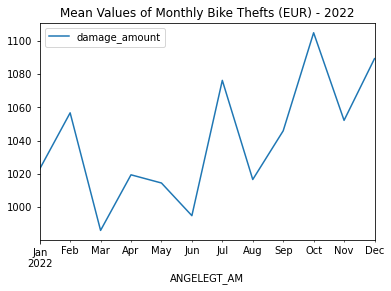

In [55]:
extract_22_resampled.plot.line(title = 'Mean Values of Monthly Bike Thefts (EUR) - 2022');

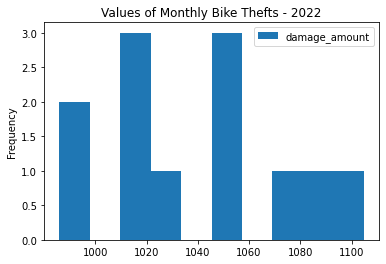

In [56]:
extract_22_resampled.plot.hist(bins = 10, title = 'Values of Monthly Bike Thefts - 2022');

In [57]:
extract_2023 = df_transformed.loc['2023-01-01':'2023-02-19']
extract_2023.head(2)

,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [58]:
extract_23_resampled = extract_2023.resample('M')
extract_23_resampled = extract_23_resampled['LOR', 'damage_amount'].mean().round(2)
bike_thefts.save_intermediate_data(extract_23_resampled, 'extract_23_resampled')

In [59]:
bike_thefts.save_intermediate_data(extract_2022, 'bike_thefts_df_2022')
bike_thefts.save_intermediate_data(extract_2023, 'bike_thefts_df_2023')

## Extract series for individual years and plot numeric data: thefts

In [60]:
extract_2022.reset_index(inplace=True)
extract_2022.head(2)

,ANGELEGT_AM,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
0,2022-12-31,2022-12-26,20,2022-12-27,9,03400724,270,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2022,12
1,2022-12-31,2022-12-30,14,2022-12-31,9,01401048,690,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,5,2022,12


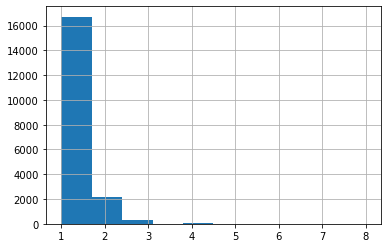

In [61]:
bike_thefts_series_22 = pd.DataFrame(extract_2022.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_22 = bike_thefts_series_22.set_index(bike_thefts_series_22['ANGELEGT_AM'])
bike_thefts_series_22 = bike_thefts_series_22['bike_theft_count']
bike_thefts_series_22.hist();

In [62]:
bike_thefts_series_22.index

DatetimeIndex(['2022-01-09', '2022-01-18', '2022-03-09', '2022-04-09',
               '2022-04-28', '2022-05-16', '2022-05-29', '2022-06-12',
               '2022-06-13', '2022-07-04',
               ...
               '2022-08-04', '2022-09-21', '2022-09-22', '2022-10-23',
               '2022-01-08', '2022-03-10', '2022-07-26', '2022-08-15',
               '2022-09-24', '2022-11-10'],
              dtype='datetime64[ns]', name='ANGELEGT_AM', length=19295, freq=None)

In [63]:
bike_thefts_series_22.describe()

count    19295.000000
mean         1.159109
std          0.444700
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bike_theft_count, dtype: float64

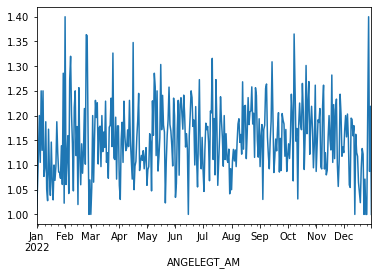

In [64]:
(bike_thefts_series_22
.resample('D')  #change frequency
.mean()
.plot.line()
);

In [65]:
bike_thefts_series_22.isna().sum().sum()

0

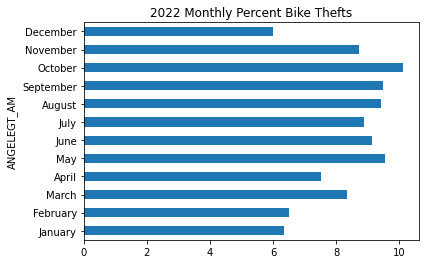

In [66]:
(bike_thefts_series_22
 .resample('M')
 .sum()
 .div(bike_thefts_series_22.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2022 Monthly Percent Bike Thefts')
 );

In [67]:
bike_thefts.save_intermediate_data(bike_thefts_series_22, 'bike_thefts_series_2022')

In [68]:
extract_2023.reset_index(inplace=True)
extract_2023.head(2)

,ANGELEGT_AM,start_date_delict,start_time_delict,end_date_delict,end_time_delict,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,2023-02-18,18,2023-02-19,7,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,2023-02-18,20,2023-02-19,9,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


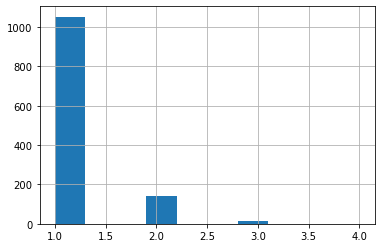

In [69]:
bike_thefts_series_23 = pd.DataFrame(extract_2023.groupby(['LOR', 'ANGELEGT_AM']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_series_23 = bike_thefts_series_23.set_index(bike_thefts_series_23['ANGELEGT_AM'])
bike_thefts_series_23 = bike_thefts_series_23['bike_theft_count']
bike_thefts_series_23.hist();

In [70]:
bike_thefts_series_23.describe()

count    1209.000000
mean        1.142266
std         0.387651
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: bike_theft_count, dtype: float64

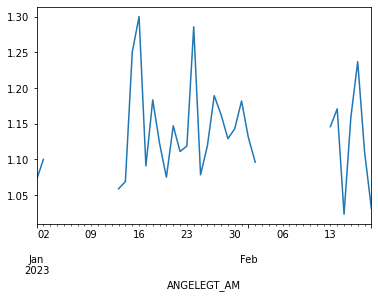

In [71]:
(bike_thefts_series_23
.resample('D')
.mean()
.plot.line()
);

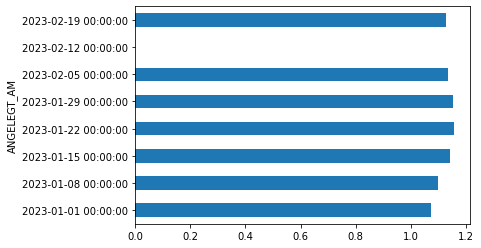

In [72]:
(bike_thefts_series_23
.resample('W')
.mean()
.plot.barh()
);

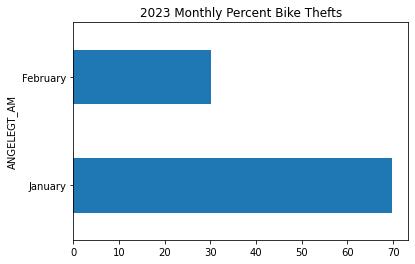

In [73]:
(bike_thefts_series_23
 .resample('M')
 .sum()
 .div(bike_thefts_series_23.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(title = '2023 Monthly Percent Bike Thefts')
 );

In [74]:
bike_thefts.save_intermediate_data(bike_thefts_series_23, 'bike_thefts_series_2023')

In [75]:
df_transformed.drop(df_transformed.iloc[:, 0:4], axis=1, inplace=True)
df_transformed.head(2) #check

,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
ANGELEGT_AM,,,,,,,,,,
2023-02-19,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
2023-02-19,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [76]:
bike_thefts.check_unique(df_transformed['crime_duration_hours'])  # check: can this be so long?

array([11, 16, 17,  0, 10, 22,  4,  1,  9,  2,  7,  5,  3,  6, 23,  8, 20,
       14, 12, 13, 15, 19, 18, 21])

In [77]:
df_transformed.reset_index(inplace=True)
df_transformed.head(2)

,ANGELEGT_AM,LOR,damage_amount,intent_delict,bike_type,delict,description,crime_duration_days,crime_duration_hours,year,month
0,2023-02-19,03701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2
1,2023-02-19,01100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,1 days,11,2023,2


In [78]:
bike_thefts_LOR_year = pd.DataFrame(df_transformed.groupby(['LOR', 'year']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR_year = bike_thefts_LOR_year.reset_index()
bike_thefts_LOR_year = bike_thefts_LOR_year.set_index('year').reset_index()
bike_thefts_LOR_year.head(2)

,year,LOR,bike_theft_count
0,2022,01100101,26
1,2023,01100101,2


In [79]:
bike_thefts.save_LOR_bike_thefts(
    df = bike_thefts_LOR_year, 
    group_by =['LOR', 'year'],
    col_names='bike_theft_count',
    file = 'bike_thefts_year_LOR_count'
    ) #check

## Plot categoricals

In [80]:
plot_cats = PlotBikeThefts()

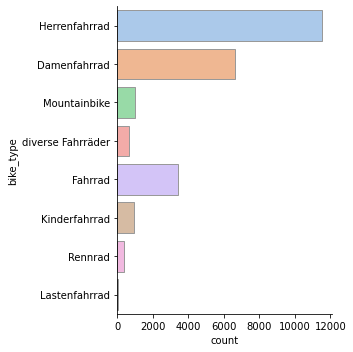

In [81]:
plot_cats.plot_categoricals(df, 'bike_type');

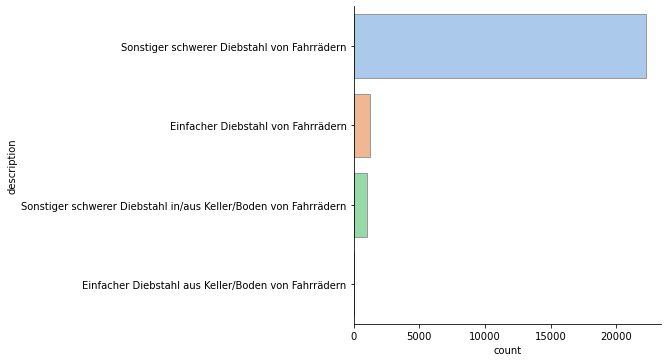

In [82]:
plot_cats.plot_categoricals(df, 'description');

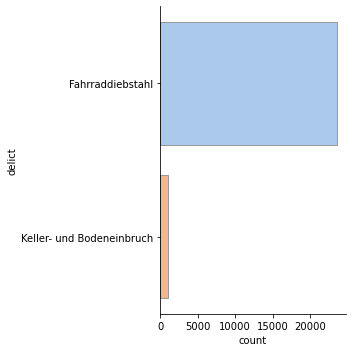

In [83]:
plot_cats.plot_categoricals(df, 'delict');

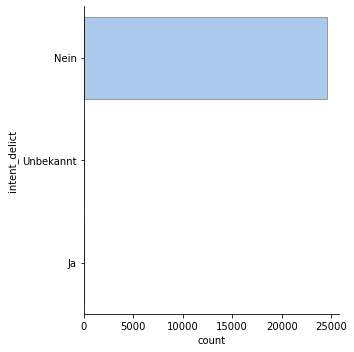

In [84]:
plot_cats.plot_categoricals(df, 'intent_delict');

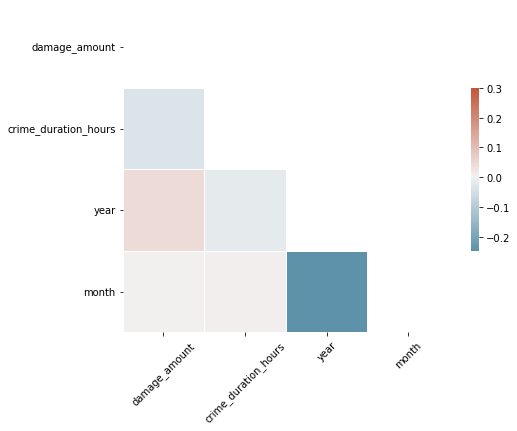

In [85]:
plot_cats.plot_correlations(df);